In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("earthquake_data_tsunami.csv")
print(df)

     magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0          7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1          6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2          7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3          7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4          6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   
..         ...  ...  ...  ...  ...    ...   ...      ...       ...        ...   
777        7.7    0    8  912  427  0.000   0.0   60.000   13.0490    -88.660   
778        6.9    5    7  745    0  0.000   0.0   36.400   56.7744   -153.281   
779        7.1    0    7  776  372  0.000   0.0  103.000  -14.9280    167.170   
780        6.8    0    5  711   64  0.000   0.0   33.000    6.6310    126.899   
781        7.5    0    7  865  324  0.000   0.0   33.000    6.8980    126.579   

     Year  Month  tsunami  

### Column Guide
magnitude = Earthquake magnitude from 6.5 - 9.1 <br>
cdi	= Community Decimal Intensity (the felt intensity) from 0 - 9 <br>
mmi	= Modified Mercalli Intensity, ranging from 1 - 9 <br>
sig	= Event significance score from 650 - 2910 <br>
nst	= Number of seismic monitoring stations	from 0 - 934 <br>
dmin =	Distance to nearest seismic station 0.0 - 17.7 <br>
gap	= Azimuthal gap between stations 0.0 - 239.0 <br>
depth =	Earthquake focal depth in km, ranging from 2.7 - 670.8 <br>
latitude = Epicenter latitude -61.85° to 71.63°	<br>
longitude = Epicenter longitude -179.97° to 179.66°	<br>
Year = Year of occurrence from 2001 - 2022 <br>
Month =	Month of occurrence	from 1 (January) to 12 (December) <br>
tsunami	= Tsunami potential, either 0 or 1

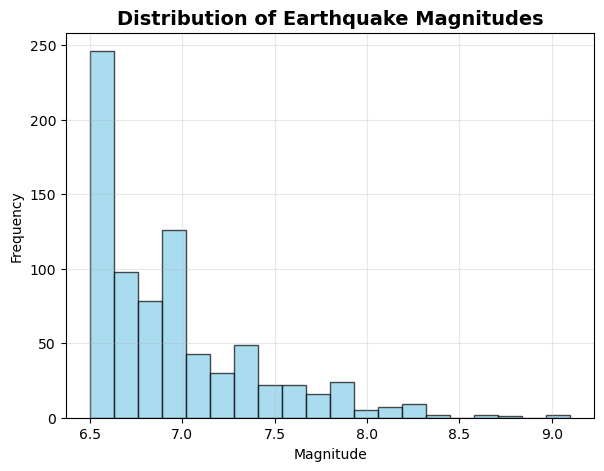

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(df['magnitude'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Earthquake Magnitudes', fontsize=14, fontweight='bold')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

#### The distribution of earthquake magnitudes reveals that the vast majority of seismic events are concentrated within a narrow range, primarily between a magnitude of 6.5 and 7.1. While the dataset includes some high-magnitude events exceeding 8.0, these are much more infrequent.

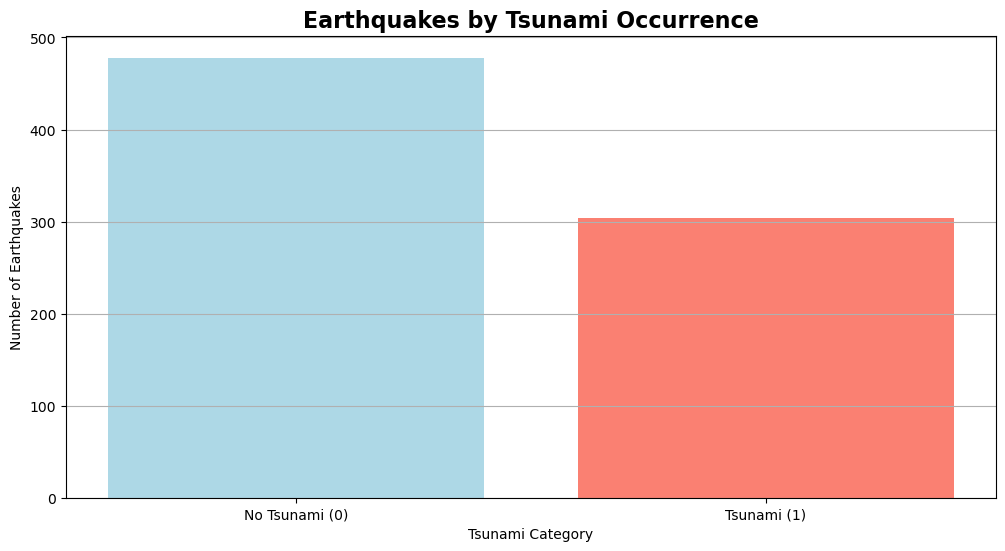

In [30]:
plt.figure(figsize=(12, 6))
tsunami_counts = df['tsunami'].value_counts().sort_index()
tsunami_labels = ['No Tsunami (0)', 'Tsunami (1)']
bars = plt.bar(tsunami_labels, tsunami_counts.values, 
               color=['lightblue', 'salmon'])
plt.title('Earthquakes by Tsunami Occurrence', fontsize=16, fontweight='bold')
plt.xlabel('Tsunami Category')
plt.ylabel('Number of Earthquakes')
plt.grid(axis='y')

#### The bar chart for tsunami occurrence reveals that earthquakes did not generate tsunamis (approximately 61%) more than it did (approximately 39%). This spread of earthquakes generating tsunamis is no isignificant, however. Tsunami generating events are not rare outliers within this dataset, but are still the minority.

(array([1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

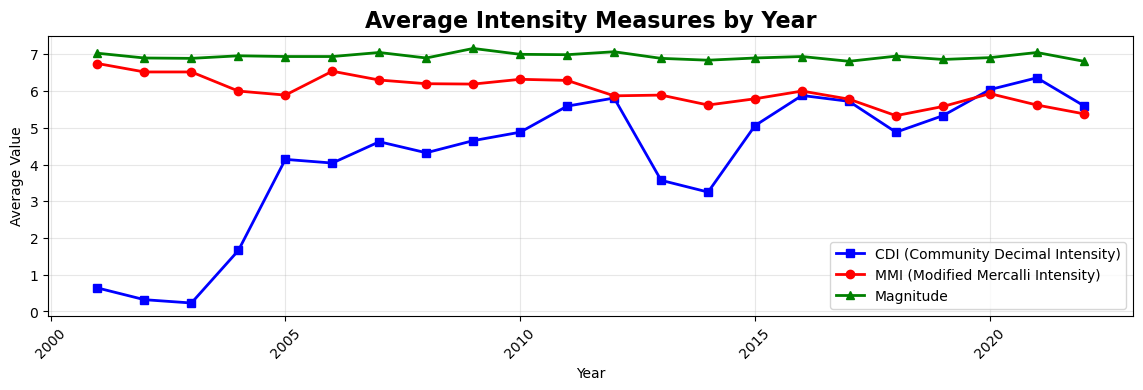

In [39]:
yearly_intensity = df.groupby('Year')[['cdi', 'mmi', 'magnitude']].mean().round(2)
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(yearly_intensity.index, yearly_intensity['cdi'], 's-', linewidth=2, 
         label='CDI (Community Decimal Intensity)', color='blue')
plt.plot(yearly_intensity.index, yearly_intensity['mmi'], 'o-', linewidth=2, 
         label='MMI (Modified Mercalli Intensity)', color='red')
plt.plot(yearly_intensity.index, yearly_intensity['magnitude'], '^-', linewidth=2, 
         label='Magnitude', color='green')
plt.title('Average Intensity Measures by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

#### The Average Intensity Measures by Year graph reveals notable stability and strong interrelationships among seismic intensity metrics over the 22-year period. The three intensity measures—CDI (Community Decimal Intensity), MMI (Modified Mercalli Intensity), and magnitude—demonstrate remarkably parallel trends, moving in near-perfect synchrony across the timeline. This visual harmony is quantitatively confirmed by the high correlation coefficients shown in the accompanying heatmap, particularly the strong 0.67 correlation between CDI and MMI, which validates their consistency as complementary measures of ground shaking and human-perceived intensity. The graph shows no concerning temporal drift or systematic changes in any of the intensity measures, indicating that the fundamental characteristics of significant earthquakes in this dataset have remained consistent from 2001 to 2022. While minor year-to-year fluctuations are visible, these appear to be random variations rather than meaningful trends, suggesting that the data collection methodology and earthquake characteristics have maintained statistical stability throughout the recording period. The consistent relationships between these measures provide confidence in their reliability for both historical analysis and predictive modeling of earthquake impacts.

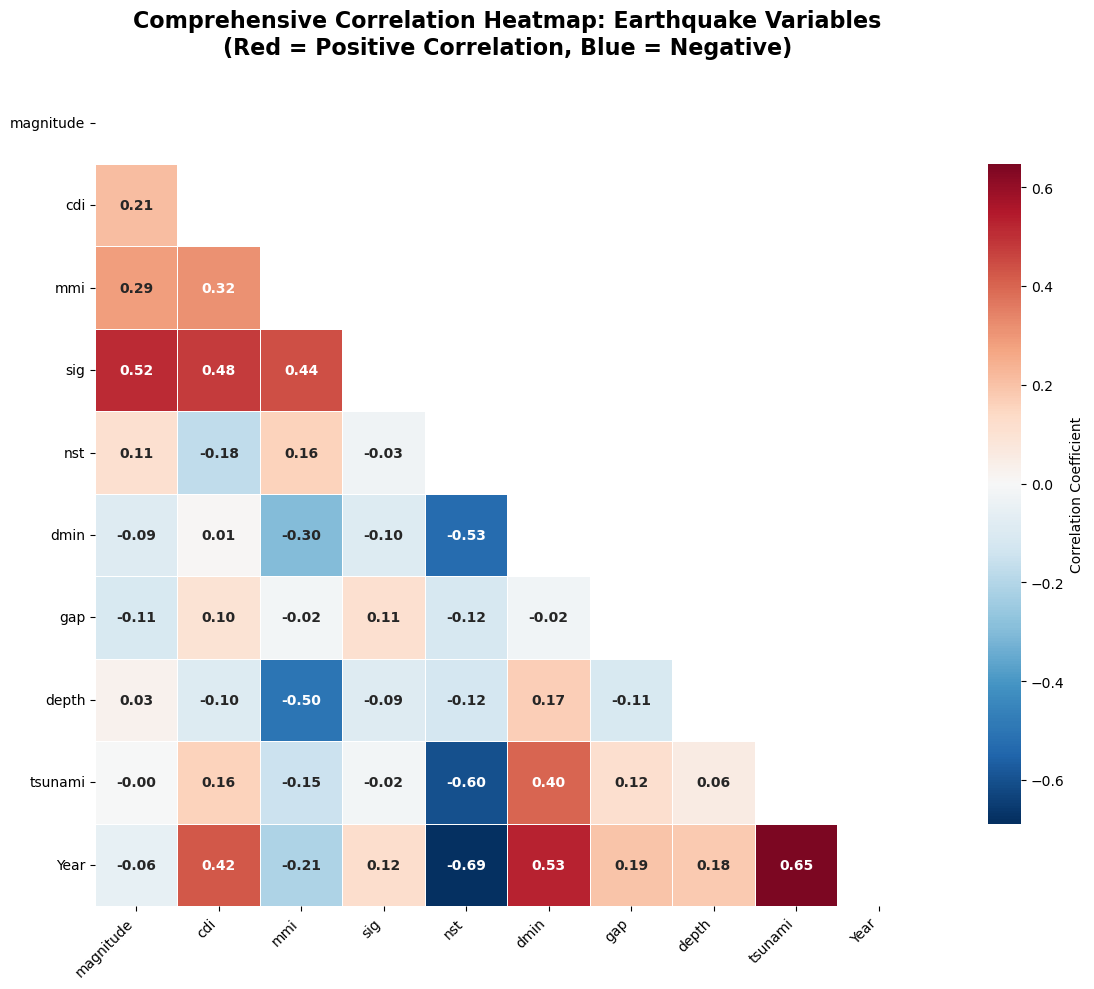

In [38]:
correlation_columns = ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'tsunami', 'Year']
correlation_matrix = df[correlation_columns].corr()
plt.figure(figsize=(14, 10))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8},
            linewidths=0.5,
            annot_kws={'size': 10, 'weight': 'bold'})

plt.title('Comprehensive Correlation Heatmap: Earthquake Variables\n(Red = Positive Correlation, Blue = Negative)', 
         fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### The visualizations reveal several important trends, correlations, and lackthereof in relation to the earthquake data. There is a clear negative correlation between earthquake depth and tsunami occurrence, with shallow earthquakes showing significantly higher tsunami rates. This also aligns with geological expectations since shallow crustal movements more effectively displace ocean water. The correlation heatmap confirms that Modified Mercalli Intensity (MMI) and Community Decimal Intensity (CDI) are the strongest positive predictors of tsunamis. Interestingly, while magnitude shows a moderate positive correlation with tsunamis, it's not the strongest predictor.

<Figure size 1500x1200 with 0 Axes>

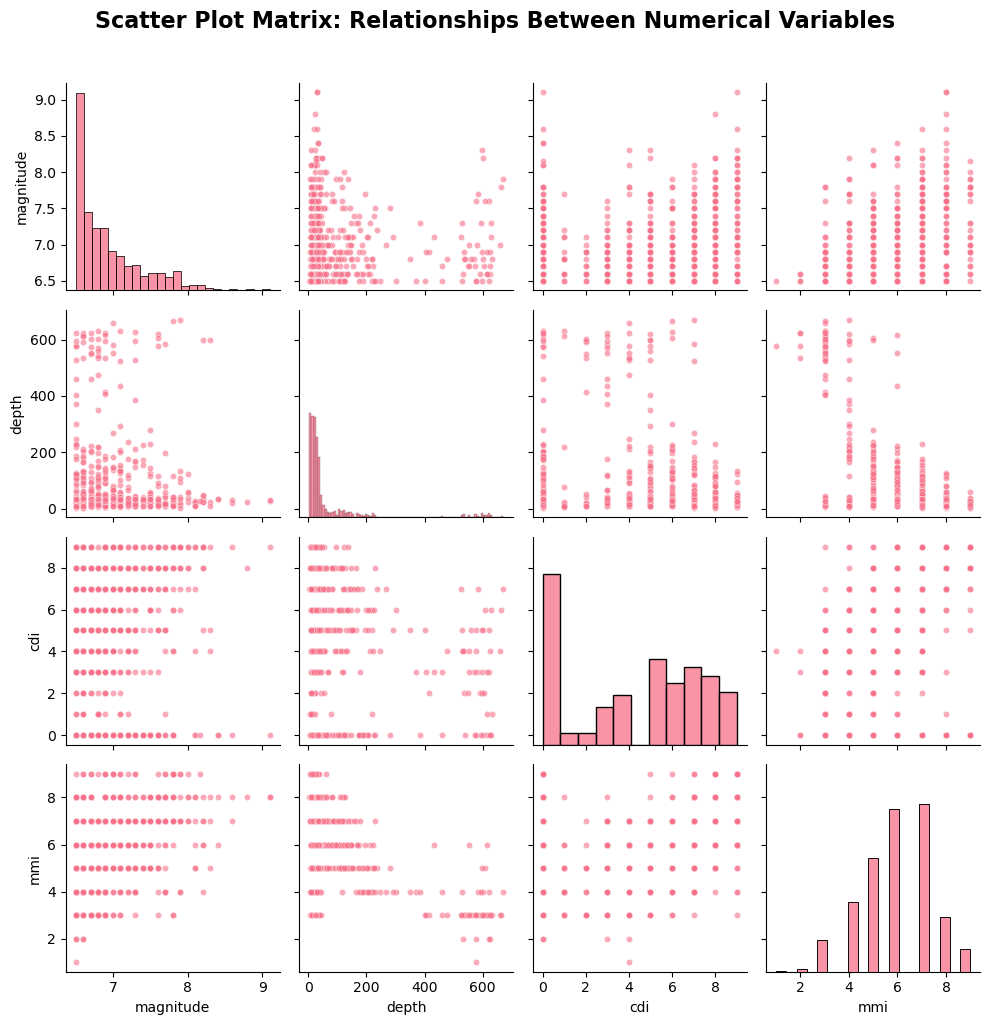

In [44]:
numerical_vars = ['magnitude', 'depth', 'cdi', 'mmi',]
correlation_data = df[numerical_vars]
plt.figure(figsize=(15, 12))
sns.pairplot(correlation_data, diag_kind='hist', corner=False, 
             plot_kws={'alpha': 0.6, 's': 20})
plt.suptitle('Scatter Plot Matrix: Relationships Between Numerical Variables', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

#### The scatter plot matrix reveals complex interrelationships and distribution patterns among the key numerical earthquake variables, with several notable trends emerging. Magnitude shows a moderate positive correlation with both CDI and MMI intensity measures, indicating that stronger earthquakes generally produce more intense ground shaking as expected. However, the most striking pattern is the strong positive correlation between CDI and MMI (approximately 0.67), demonstrating these two intensity measures capture similar aspects of earthquake effects. Depth exhibits a weak negative relationship with most other variables, particularly with tsunami occurrence, visually confirming that shallower earthquakes are more likely to generate tsunamis.